<a href="https://colab.research.google.com/github/zain910128/MS-Real_Estate_Case_Study/blob/master/Real_Estate_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Open in Colab to view graphs

# <center>Real Estate Case Study</center>
# <center>Zillow / Airbnb Dataset </center>


# Problem Statement
You are consulting for a real estate company that has a niche in purchasing properties to
rent out short-term as part of their business model specifically within New York City. The
real estate company has already concluded that two bedroom properties are the most
profitable; however, they do not know which zip codes are the best to invest in.
The real estate company has engaged your firm to build out a data product and provide
your conclusions to help them understand which zip codes would generate the most
profit on short term rentals within New York City.

You can assume an occupancy rate of 75% or you can come up with your own
model to calculate occupancy; just let us know how you came to that
calculation

After meeting with the strategy team, you’ve got an idea of where to start, key concerns,
and how you can help this real estate company with the market data while keeping the
following assumptions in mind:
- The investor will pay for the property in cash (i.e. no mortgage/interest rate will
need to be accounted for).
- The time value of money discount rate is 0% (i.e. $1 today is worth the same
100 years from now).
- All properties and all square feet within each locale can be assumed to be
homogeneous (i.e. a 1000 square foot property in a locale such as Bronx or
Manhattan generates twice the revenue and costs twice as much as any other
500 square foot property within that same locale.)


# Assumptions
Apart from the assumptions mentioned in the problem statement:
- We suppose that the client has USD 10,000,000 to invest and would like to maximise returns on that amount. This will help us make the solution easier to understand and relate.
- We suppose that the client is willing to spend that money all in one zipcode only
- We assume that the capital is invested completely.
- We assume that rental income and appreciation of property price are both considered as profits.

In [1]:
from IPython.core.display import display,HTML
display(HTML('<style>.prompt{width: 0px; min-width: 0px; visibility: collapse}</style>'))

In [2]:
!pip install plotly==4.5.0

     |████████████████████████████████| 7.1MB 26kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import plotly.graph_objects as go

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning:

pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.



# Analysis

## Step 1 - Reusability
To make the code resuable and scalable, we define global variables for City and number of bedrooms so that when a different analysis needs to be undertaken, we may simply make changes in one place and not have to make other changes to the rest of the code:

In [4]:
CITY = 'New York'
BEDS = 2
STATE = 'NY'
CAPITAL = 10000000

## Step 2(a) - Getting the data
We now import our datasets and check for duplicate records.

In [5]:
bnb_df= pd.read_csv("listings.csv",low_memory=False)
bnb_df.shape

(48895, 106)

In [6]:
bnb_df.drop_duplicates(subset=None, keep='first', inplace=False).shape

(48895, 106)

In [7]:
zil_df= pd.read_csv("Zip_Zhvi_2bedroom.csv")
zil_df.shape

(8946, 262)

In [8]:
zil_df.drop_duplicates(subset=None, keep='first', inplace=False).shape

(8946, 262)

No duplicates in the data were found

In [9]:
dfz = zil_df.copy()
dfa = bnb_df.copy()

## Step 2(b) - Exploring the data
We now take a quick look at the datasets to understand what we have to work with

In [10]:
dfz.describe()

,RegionID,RegionName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,1999-01,1999-02,1999-03,1999-04,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
count,8946.000000,8946.000000,8946.000000,6284.000000,6364.000000,6364.000000,6369.000000,6370.000000,6370.000000,6370.000000,6380.000000,6380.000000,6404.000000,6833.000000,6853.000000,6853.000000,6853.000000,6855.000000,6855.000000,6952.000000,6955.000000,6955.000000,6958.000000,6962.000000,6979.000000,7124.000000,7125.000000,7081.000000,6973.000000,6985.000000,7170.000000,7204.000000,7204.000000,7216.000000,7237.000000,7239.000000,7240.000000,7257.000000,7258.000000,7258.000000,...,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.928000e+03,8.928000e+03,8.928000e+03,8.928000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.943000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03,8.946000e+03
mean,80671.285938,47494.449027,4473.500000,93754.057925,93616.043369,93642.630421,93609.734652,93646.357928,93722.339089,93849.262166,94025.501567,94291.630094,94557.229856,95011.868872,95463.942799,95714.110608,95972.946155,96269.905179,96619.649891,96947.180667,97364.816679,97776.276060,98262.762288,98803.820741,99406.118355,99959.446940,100517.361404,100459.723203,100066.355944,100452.083035,102100.237099,102587.756802,103051.415880,103834.950111,104544.300124,105096.118248,105706.616022,106298.897616,106903.857812,107532.212731,...,1.757412e+05,1.765698e+05,1.774041e+05,1.783335e+05,1.793027e+05,1.802319e+05,1.810981e+05,1.819623e+05,1.827956e+05,1.834246e+05,1.839785e+05,1.848837e+05,1.861289e+05,1.873651e+05,1.885247e+05,1.897510e+05,1.910373e+05,1.922455e+05,1.933378e+05,1.944602e+05,1.956039e+05,1.965611e+05,1.974181e+05,1.982974e+05,1.993878e+05,2.003979e+05,2.012927e+05,2.022298e+05,2.031741e+05,2.043478e+05,2.057233e+05,2.071612e+05,2.086479e+05,2.099822e+05,2.110339e+05,2.121189e+05,2.132461e+05,2.143624e+05,2.155610e+05,2.165161e+05
std,31636.286116,30868.419487,2582.632088,44385.146499,44222.734487,44225.112290,44264.266105,44340.199368,44457.610118,44605.248316,44773.218214,45026.582093,45344.459962,46149.394578,46423.010731,46652.429525,46907.593302,47181.059128,47523.316384,48060.645231,48465.508522,48857.823653,49348.717113,49873.140170,50383.065240,51326.441982,51836.108047,51956.921766,51140.321465,51601.495634,53474.697849,53977.805791,54489.848933,56003.438992,56555.470915,57041.690009,57582.334661,58041.773525,58484.244650,59054.510251,...,1.607512e+05,1.620268e+05,1.631278e+05,1.642909e+05,1.655486e+05,1.666893e+05,1.678116e+05,1.691114e+05,1.702487e+05,1.710593e+05,1.719973e+05,1.736103e+05,1.755687e+05,1.773178e+05,1.787649e+05,1.802985e+05,1.819055e+05,1.832513e+05,1.842652e+05,1.855609e+05,1.869549e+05,1.882444e+05,1.896037e+05,1.913690e+05,1.925729e+05,1.930769e+05,1.931679e+05,1.929357e+05,1.931751e+05,1.941197e+05,1.952097e+05,1.960432e+05,1.970957e+05,1.981392e+05,1.988496e+05,1.995264e+05,2.004473e+05,2.017663e+05,2.031817e+05,2.041795e+05
min,58196.000000,1001.000000,1.000000,22400.000000,23500.000000,24500.000000,25400.000000,26200.000000,26700.000000,27200.000000,27700.000000,28100.000000,28600.000000,28800.000000,28800.000000,28300.000000,28100.000000,28000.00000

In [11]:
dfz.dtypes

RegionID       int64
RegionName     int64
City          object
State         object
Metro         object
               ...  
2017-02        int64
2017-03        int64
2017-04        int64
2017-05        int64
2017-06        int64
Length: 262, dtype: object

In [12]:
dfz.isnull().sum(axis=0)

RegionID        0
RegionName      0
City            0
State           0
Metro         250
             ... 
2017-02         0
2017-03         0
2017-04         0
2017-05         0
2017-06         0
Length: 262, dtype: int64

In [13]:
dfz.nunique()

RegionID      8946
RegionName    8946
City          4684
State           48
Metro          466
              ... 
2017-02       3639
2017-03       3655
2017-04       3661
2017-05       3684
2017-06       3699
Length: 262, dtype: int64

In [14]:
dfz['State'].value_counts()

CA    1016
FL     716
PA     550
OH     509
NY     475
MA     438
IN     431
IL     316
WA     315
VA     299
NC     293
MI     261
CO     243
TX     241
CT     234
GA     225
MN     206
OR     190
NH     189
MO     171
NJ     160
TN     119
AZ     115
WI     105
SC     105
MD      93
KS      89
AL      87
KY      84
OK      80
NE      64
UT      63
NV      61
RI      60
IA      54
MS      48
HI      44
ID      33
DE      28
NM      23
MT      23
DC      21
LA      20
AR      18
AK      14
ND       8
WY       6
WV       3
Name: State, dtype: int64

In [15]:
dfa.dtypes

id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
                                                 ...   
calculated_host_listings_count                    int64
calculated_host_listings_count_entire_homes       int64
calculated_host_listings_count_private_rooms      int64
calculated_host_listings_count_shared_rooms       int64
reviews_per_month                               float64
Length: 106, dtype: object

In [16]:
dfa['city'].value_counts()

New York             21934
Brooklyn             18978
Queens                4328
Bronx                  773
Brooklyn               694
                     ...  
Brooklyn New York        1
Woodside, Queens         1
Brookyln                 1
New York,                1
ASTORIA/LIC              1
Name: city, Length: 305, dtype: int64

## Step 3 - Data filtering and subsetting

We now add a metric for measuring the rent earned per square foot in the airbnb dataset. First we need to check how many missing values we have in the Square feet column.

In [17]:
dfa.square_feet.isna().sum()

48487

Turns out that hardly any rows have the square feet provided. So we cannot create this metric.

Since our analysis will be based on zipcodes, let's remove rows that do not have zipcodes.

In [18]:
dfa1 = dfa[~dfa.iloc[:,43].apply(np.isreal)]
dfa1.shape

(48378, 106)

Let's only retain the columns that are of interest to us in the airbnb dataset

In [19]:
dfa1 = dfa1[
    ['summary','space','description','neighborhood_overview','notes',
     'transit','access','host_response_rate','host_is_superhost',
     'host_listings_count','city','state', 'zipcode','property_type','room_type',
     'bathrooms','bedrooms','beds','price','number_of_reviews','review_scores_rating']
           ]
dfa1.shape

(48378, 21)

Let's also filter the zillow dataset for only New York

In [20]:
dfz1 = dfz[dfz['City']== CITY]
print(dfz1.shape)
dfz1.head(2)

(25, 262)


,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,1996-07,1996-08,1996-09,1996-10,1996-11,1996-12,1997-01,1997-02,1997-03,1997-04,1997-05,1997-06,1997-07,1997-08,1997-09,1997-10,1997-11,1997-12,1998-01,1998-02,1998-03,1998-04,1998-05,1998-06,1998-07,1998-08,1998-09,1998-10,1998-11,1998-12,...,2014-03,2014-04,2014-05,2014-06,2014-07,2014-08,2014-09,2014-10,2014-11,2014-12,2015-01,2015-02,2015-03,2015-04,2015-05,2015-06,2015-07,2015-08,2015-09,2015-10,2015-11,2015-12,2016-01,2016-02,2016-03,2016-04,2016-05,2016-06,2016-07,2016-08,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1120300,1125500,1136000,1135100,1130000,1138200,1153700,1174800,1185400,1188400,1189700,1193700,1199900,1201400,1202600,1214200,1235200,1258000,1287700,1307200,1313900,1317100,1327400,1338800.0,1350400.0,1356600.0,1358500.0,1364000,1373300,1382600,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1713000,1728800,1736100,1745900,1753800,1736600,1730400,1734500,1728700,1720800,1717700,1700100,1680400,1676400,1685600,1708100,1730400,1751800,1778300,1810400,1831600,1844400,1861600,1889600.0,1901500.0,1895300.0,1890200.0,1898400,1924500,1967300,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300


## Step 4 - Visual overview of Zillow data

Let's now use sparklines to visualise the change in price over time for properties in New York.
In order to do that, we first need to create a dataframe where the columns are each zipcode's historical prices. We do this by removing unwanted columns and then transposing.

In [21]:
df_pricechart = dfz1.iloc[:,7:]
df_pricechart.index = dfz1["RegionName"]
df_pricechart = df_pricechart.T

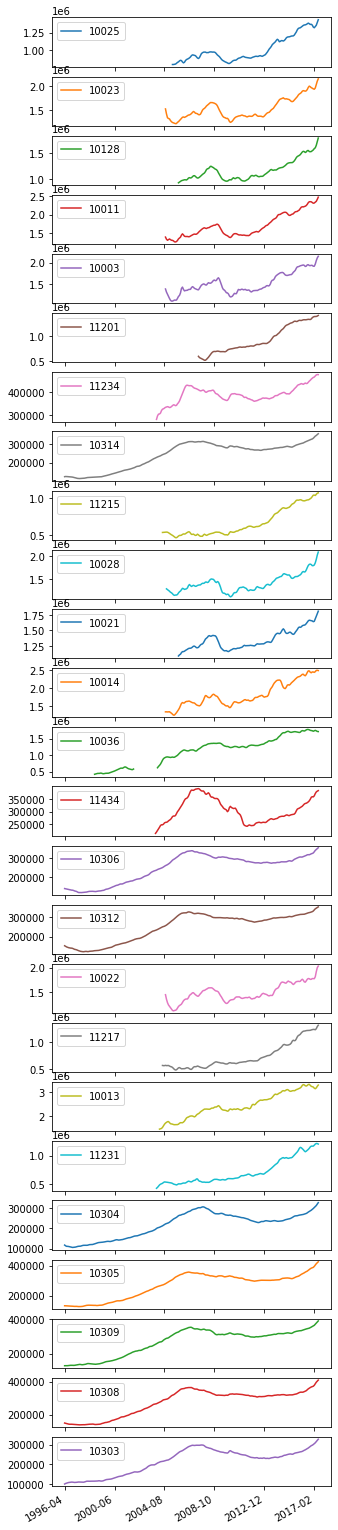

In [22]:
pricechart = df_pricechart.plot.line(subplots=True, figsize=(5,30))

We can see that the general trend is upwards, but there was a major dip in prices in the middle (corresponding to the recession). Also we can see that the rate of increase in price has not been the same in all places. 
To study their inter-relationship, let's plot them all in the same graph and make it interactive.

In [23]:
dfplot1 = df_pricechart.reset_index().melt(id_vars=['index'])
fig = px.line(dfplot1,x="index", y="value", color="RegionName")
fig.show()

From the graph, we can see that the following zipcodes have the lowest prices and have not seen much of an increase in house prices: 11234, 11434, 10308, 10305, 10309, 10312, 10306, 10314, 10304, 10303

To study this further, let's look at the % change in prices over the last ten years in zipcodes of NY. This will be useful to us because our investment will increase in value over time if we invest in a booming market.

In [24]:
pricechange = 100*(df_pricechart.iloc[-1,:] - df_pricechart.iloc[-120,:])/df_pricechart.iloc[-120,:]
pricechange.sort_values(ascending=False)

RegionName
11201    147.121238
11217    138.866471
11231    120.553722
11215    118.396900
10128     72.917271
10014     66.128817
10011     60.866463
10025     59.691999
10013     56.357550
10003     53.258619
10028     52.465613
10023     52.216854
10021     46.030725
10036     43.219064
10022     40.673037
10305     22.790295
10308     17.503587
11234     16.915911
10309     14.650617
10314     13.934949
10312     10.626363
10303     10.411051
10304      8.349835
10306      8.284750
11434     -1.595882
dtype: float64

## Step 5 - Visual overview of Airbnb data

We start by understanding the distribution of rents by number of bedrooms

In [25]:
dfa2 = dfa1.copy()
dfa2['price'] = dfa1['price'].str.replace(r'\D', '').astype(int)/100 #We remove the dollar sign from the prices
dfa2['price']

0        149.0
1        225.0
2        150.0
3         89.0
4         80.0
         ...  
48890     70.0
48891     40.0
48892    115.0
48893     55.0
48894     90.0
Name: price, Length: 48378, dtype: float64

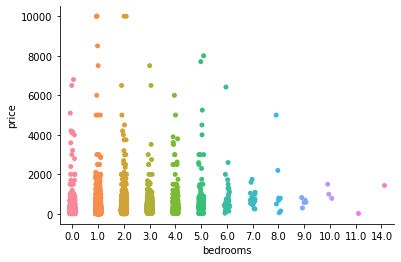

In [26]:
sns.stripplot('bedrooms', 'price', data=dfa2,jitter=1)
sns.despine()

The jitter plot shows us that there are some properties that charge upto $10,000 per night !
These could be luxury homes, incorrect entries or outliers. 

## Step 6 - Finding standard deviation and removing outliers

To avoid biased results from our analysis, let's only consider properties **within 3 standard deviations** above the mean.

In [27]:
#Standard deviations

dfa2_summary = dfa2[["price","bedrooms"]].groupby('bedrooms').agg(np.std)
dfa2_summary.columns = ['Stdev']
dfa2_summary

,Stdev
bedrooms,
0.0,253.388025
1.0,173.231530
2.0,290.919692
3.0,322.120658
4.0,572.374163
5.0,1162.651900
6.0,1026.642776
7.0,377.740961
8.0,1641.948837


In [28]:
# Means and counts

dfa2_summary['mean'] = dfa2[["price","bedrooms"]].groupby('bedrooms').mean()
dfa2_summary['3SD'] = dfa2_summary['mean'] + 3*dfa2_summary['Stdev'] #Calculating the upper bound by 3 stdev
dfa2_summary['count'] = dfa2[["price","bedrooms"]].groupby('bedrooms').count()
dfa2_summary

,Stdev,mean,3SD,count
bedrooms,,,,
0.0,253.388025,171.897033,932.061108,4516
1.0,173.231530,117.134360,636.828952,34601
2.0,290.919692,232.614084,1105.373161,6447
3.0,322.120658,308.167399,1274.529374,2049
4.0,572.374163,472.727799,2189.850290,518
5.0,1162.651900,758.006849,4245.962550,146
6.0,1026.642776,838.309524,3918.237852,42
7.0,377.740961,754.666667,1887.889549,21
8.0,1641.948837,1274.375000,6200.221510,8


Most of our data is for properties that are 4 bedrooms or less, so we discard those subsets that have less than 500 samples.

In [29]:
dfa3 = dfa2.copy()

In [30]:
dfa3 = dfa3.groupby('bedrooms').filter(lambda b: b['price'].count() > 500 )

In [31]:
dfa3[["price","bedrooms"]].groupby('bedrooms').count()

,price
bedrooms,
0.0,4516
1.0,34601
2.0,6447
3.0,2049
4.0,518


In [32]:
def checkSDRange(p,b):
    if p > dfa2_summary.loc[b,'3SD']:  # We set nan where price is above 3 standard deviation or is zero
        r = np.nan
    elif p==0:
        r = np.nan
    else:
        r = p
    return r

In [33]:
dfa3['price'] = dfa3.apply(lambda x: checkSDRange(x['price'], x['bedrooms']), axis=1)

We remove all rows having nan in the price column, leaving the filtered data

In [34]:
dfa3.dropna(subset=['price'], inplace=True) 

Let's review the jitter plot to see if the range of per night price looks reasonable

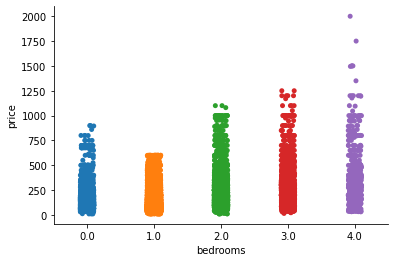

In [35]:
sns.stripplot('bedrooms', 'price', data=dfa3)
sns.despine()

In [36]:
print( "Let's see how many rows have been deleted by our cleaning")

dfa2.bedrooms.count()-dfa3.bedrooms.count()

Let's see how many rows have been deleted by our cleaning


545

## Step 7 - Removing zipcodes which do not have much data
### Note: The reasons we have not yet filtered the data to only zipcodes in NY is because we don't want to draw inference on a reduced sample size. Once we move to recommendations for specifically NY, we will filter the zipcodes to NY only.

In [37]:
dfa3[["zipcode","bedrooms"]].groupby('zipcode').count().reset_index().bedrooms.describe()

count     197.000000
mean      242.705584
std       365.552342
min         1.000000
25%        20.000000
50%        62.000000
75%       339.000000
max      2199.000000
Name: bedrooms, dtype: float64

The output shows summary statistics of the count of properties for each zipcode.
We see that some zipcodes have only 1 property.

We consider only those zip codes which have more than 15 listings so that our analysis is not based on sparse data.

In [38]:
dfa3 = dfa3.groupby('zipcode').filter(lambda b: b['bedrooms'].count() > 15 )
dfa3[["zipcode","bedrooms"]].groupby('zipcode').count().reset_index().bedrooms.describe()

count     156.000000
mean      304.967949
std       387.584853
min        16.000000
25%        49.000000
50%       121.000000
75%       418.500000
max      2199.000000
Name: bedrooms, dtype: float64

Now the minimum count of listings in a zipcode is 16, which is much better than before for quantitative analysis

## Step 8 - Determinig what affects rental income

We can run a quick check to see the correlation of price with other factors

In [39]:
dfa3['host_response_rate'] = dfa3['host_response_rate'].str.replace(r'\D', '').astype(float)

In [40]:
dfa3.corr().price

host_response_rate      0.003764
host_listings_count     0.150182
bathrooms               0.250288
bedrooms                0.391514
beds                    0.403781
price                   1.000000
number_of_reviews      -0.054807
review_scores_rating    0.058335
Name: price, dtype: float64

It seems like number of bedrooms has a positive correlation to price. Apart from sleeping space (bedroom and beds), the number of bathrooms has the next highest correlation.

Since the client has already decided to go for 2 bedroom properties, we can suggest them to provide 2 bathrooms as the number of bathrooms has a slightly positive correlation to rental income.

There is definitely collinearity between bedrooms and beds. However, magnitude the collinearity between bedrooms and bathrooms needs to be explored.

## Step 9 - Analysing zipcodes in NY

In [41]:
dfa4 = dfa3[dfa3['state']== STATE] #contains only NY listings

In [42]:
dfa4.corr().price

host_response_rate      0.003797
host_listings_count     0.150194
bathrooms               0.250336
bedrooms                0.391654
beds                    0.403802
price                   1.000000
number_of_reviews      -0.054767
review_scores_rating    0.058328
Name: price, dtype: float64

If we compare correlation of price and bedrooms, it is the same as the national level.

In [43]:
dfa4.price.describe() #summary stats of prices in NY

count    47560.000000
mean       138.826766
std        111.738685
min         10.000000
25%         69.000000
50%        105.000000
75%        175.000000
max       2000.000000
Name: price, dtype: float64

Let us see if our hypothesis about number of bathrooms can be validated with quick summary statistics.
We find the mean rental price for 2 bedroom properties with 2 and 1 bathrooms:

In [44]:
dfa4[(dfa4['bedrooms']== 2) & (dfa4['bathrooms']== 2)].price.mean()

311.3174030658251

In [45]:
dfa4[(dfa4['bedrooms']== 2) & (dfa4['bathrooms']== 1)].price.mean()

188.9651429764141

From above we see that:
Mean rent for 2 bedroom and 2 bathroom apartment is USD 311
Mean rent for 2 bedroom and 1 bathroom apartment is USD 188
 Therefore, we can conclude that adding a bathroom increases the mean rent by _65%_
 
Let's try to make a scatter plot to see this difference.

Text(0.5, 0, '')

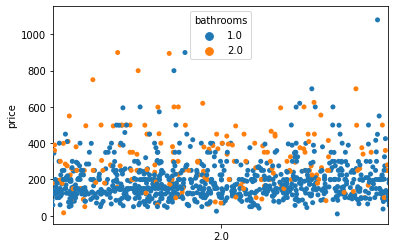

In [46]:
sns.stripplot(x="bedrooms", y="price", hue="bathrooms", data=dfa4[(dfa4['bedrooms']== 2) & ((dfa4['bathrooms'] == 1) | (dfa4['bathrooms'] == 2))], jitter=3 ).set_xlabel('')


As can be seen from the plot, the properties with 2 bathrooms have a noticeably higher distribution of rent prices.

## Step 10 - Analysing Profitability and creating metrics

We calculate profitability as = ((Average rent per night *365 days * Occupancy rate of 75% )+ (Expected annual increase in property value)) / Purchasing Price

The formula is intended to capture revenue from rent as well as take into consideration that property rates change and this can cause profit or loss.

The formula's denominator aims to take into consideration how efficiently the client's capital is used.

In [47]:
profit_valueincrease = pricechange/10 
# From the list of historical price changes over 10 years, we annualise it by dividing it by 10

In [48]:
df_profit_valueincrease = profit_valueincrease.to_frame()
df_profit_valueincrease.columns = ["YrIncr"]
df_profit_valueincrease = df_profit_valueincrease.reset_index()
df_profit_valueincrease.head(3)

,RegionName,YrIncr
0,10025,5.969200
1,10023,5.221685
2,10128,7.291727


We extract the latest available purchase price of 2 bedroom properties in various zipcodes

In [49]:
buyprice = dfz1.iloc[:,-1:].reset_index().iloc[:,-1:]
buyprice.head(2)

,2017-06
0,1431000
1,2142300


In [50]:
# We then create a single dataframe with the above extracted data
df_profit= pd.concat([df_profit_valueincrease, buyprice], axis=1,ignore_index=True)
df_profit.columns = ['zipcode','YrIncr','Buy2017']
#df_profit= df_profit.sort_values(by=['zipcode']).set_index('zipcode')
df_profit.zipcode=df_profit.zipcode.astype(int)
df_profit

,zipcode,YrIncr,Buy2017
0,10025,5.969200,1431000
1,10023,5.221685,2142300
2,10128,7.291727,1787100
3,10011,6.086646,2480400
4,10003,5.325862,2147000
5,11201,14.712124,1420700
6,11234,1.691591,476900
7,10314,1.393495,357300
8,11215,11.839690,1070800
9,10028,5.246561,2083900


### Bringing both datasets to the same time period
The zillow data has prices till 2017. We use the ten year average price appreciation rate to calculate prices in 2019 by:

In [51]:

df_profit["Buy"] = (df_profit.Buy2017)*(1+df_profit.YrIncr/100)*(1+df_profit.YrIncr/100)
df_profit = df_profit.drop(columns=['Buy2017'])
df_profit

,zipcode,YrIncr,Buy
0,10025,5.969200,1.606937e+06
1,10023,5.221685,2.371870e+06
2,10128,7.291727,2.057223e+06
3,10011,6.086646,2.791536e+06
4,10003,5.325862,2.381782e+06
5,11201,14.712124,1.869481e+06
6,11234,1.691591,4.931709e+05
7,10314,1.393495,3.673273e+05
8,11215,11.839690,1.339369e+06
9,10028,5.246561,2.308302e+06


We extract average rents by zipcode

In [52]:
dfa5 = dfa4[dfa4['bedrooms']== 2][['zipcode','price']].groupby('zipcode').mean()
dfa5.columns = ['Avgrent']
dfa5 = dfa5.reset_index()
dfa5.zipcode = dfa5.zipcode.astype(int)
dfa5

,zipcode,Avgrent
0,10001,378.071429
1,10002,265.219653
2,10003,293.296296
3,10004,322.714286
4,10005,357.195122
...,...,...
147,11435,199.000000
148,11436,112.666667
149,11691,227.000000
150,11692,171.250000


Now we create the metrics of interest:

In [53]:
# We do an inner join with the data dataframes so that we have all the metrics in one dataframe.

df_profit1 = dfa5.join(df_profit.set_index('zipcode'), on='zipcode')
df_profit1 = df_profit1.dropna()

# Metrics

df_profit1['TotalIncome']=((df_profit1['Avgrent']*365 * .75) + (df_profit1['Buy']*df_profit1['YrIncr']/100))
df_profit1['Profitability'] = df_profit1['TotalIncome']/df_profit1['Buy']

In [54]:
df_profit1['BreakevenYears_byrent']= df_profit1['Buy']/(df_profit1['Avgrent']*365 * .75)
df_profit1['100pc_return_byTotalIncome']= df_profit1['Buy']/(df_profit1['TotalIncome'])
df_profit1['UnitsBought']= CAPITAL/df_profit1['Buy']
df_profit1['TotRevenue']= df_profit1['TotalIncome']*df_profit1['UnitsBought']
df_profit1 = df_profit1.sort_values(by=['Profitability'], ascending=False)
df_profit1

,zipcode,Avgrent,YrIncr,Buy,TotalIncome,Profitability,BreakevenYears_byrent,100pc_return_byTotalIncome,UnitsBought,TotRevenue
76,11201,243.682353,14.712124,1.869481e+06,341748.382633,0.182804,28.024819,5.470343,5.349079,1.828039e+06
91,11217,204.262295,13.886647,1.689105e+06,290476.857864,0.171971,30.207468,5.814938,5.920295,1.719709e+06
104,11231,207.978495,12.055372,1.510410e+06,239019.675957,0.158248,26.529089,6.319187,6.620718,1.582482e+06
89,11215,181.608466,11.839690,1.339369e+06,208292.465327,0.155515,26.940773,6.430233,7.466202,1.555154e+06
45,10305,132.000000,2.279029,4.446971e+05,46269.778029,0.104048,12.306548,9.610963,22.487216,1.040479e+06
41,10128,226.156250,7.291727,2.057223e+06,211917.346278,0.103011,33.229102,9.707666,4.860922,1.030114e+06
21,10025,253.134454,5.969200,1.606937e+06,165216.858624,0.102815,23.189616,9.726231,6.223018,1.028147e+06
46,10306,117.500000,0.828475,3.587716e+05,35137.957973,0.097940,11.153882,10.210371,27.872886,9.793963e+05
146,11434,136.875000,-0.159588,3.810808e+05,36861.371474,0.096729,10.170417,10.338214,26.241157,9.672850e+05
12,10014,315.181818,6.612882,2.832029e+06,273559.746706,0.096595,32.823312,10.352506,3.531037,9.659497e+05


In [55]:
df_profit1.shape

(21, 10)

We find that we are only left with 21 zipcodes in NY after the merge. The other zipcodes were left out as they were either not present in both datasets, or were filtered out in one of the earlier data cleaning steps.

## Step 11 - Selecting the best options

In the above table, we see that some properties have high profitability (revenue by rent + appreciation of property price), whereas some other properties have a faster breakeven if only the rental income is considered.

Ideally, we want a property that has high Profitability and fastest breakeven at the same time.

Let's make some plots to see if we can find such lucrative zipcodes.

In [56]:
fig_rev = px.scatter(df_profit1, y="Avgrent", x="BreakevenYears_byrent",  hover_data=['zipcode'], color='Profitability')

fig_rev.add_shape(
        go.layout.Shape(type="line",xref="paper",yref="paper",y0=.5,x0=0,y1=.5,x1=1,
            line=dict(color="LightSeaGreen",width=1,),
        ))
fig_rev.add_shape(
        go.layout.Shape(type="line",xref="paper",yref="paper",x0=.5,y0=0,x1=.5,y1=1,
            line=dict(color="LightSeaGreen",width=1,),
        ))
fig_rev.update_traces(marker=dict(size=12,
                              line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))

print()

In [57]:
fig_rev1 = px.scatter(df_profit1, y="TotalIncome", x="100pc_return_byTotalIncome",  
                     hover_data=['zipcode'], color='Profitability')

fig_rev1.add_shape(
        go.layout.Shape(type="line",xref="paper",yref="paper",y0=.5,x0=0,y1=.5,x1=1,
            line=dict(color="LightSeaGreen",width=1,),
        ))
fig_rev1.add_shape(
        go.layout.Shape(type="line",xref="paper",yref="paper",x0=.5,y0=0,x1=.5,y1=1,
            line=dict(color="LightSeaGreen",width=1,),
        ))
fig_rev1.update_traces(marker=dict(size=12,
                              line=dict(width=2,color='DarkSlateGrey')),selector=dict(mode='markers'))

print()

In [58]:
fig_rev2 = px.scatter(df_profit1, y="TotRevenue", x="100pc_return_byTotalIncome",  
                     hover_data=['zipcode'], color='Profitability')

fig_rev2.add_shape(
        go.layout.Shape(type="line",xref="paper",yref="paper",y0=.5,x0=0,y1=.5,x1=1,
            line=dict(color="LightSeaGreen",width=1,),
        ))
fig_rev2.add_shape(
        go.layout.Shape(type="line",xref="paper",yref="paper",x0=.5,y0=0,x1=.5,y1=1,
            line=dict(color="LightSeaGreen",width=1,),
        ))
fig_rev2.update_traces(marker=dict(size=4,
                              line=dict(width=1,color='DarkSlateGrey')),selector=dict(mode='markers'))

print()

In [59]:
fig_rev.show()
print('The above graph shows how many years(X-axis) it would take to recover investment if only rent is considered as income')
fig_rev1.show()
print('The above graph shows how many years(X-axis) it would take to earn 100% profit by considering income from rent and property price appreciation from a single 2 bedroom property in the corresponding zipcode')
# fig_rev2.show()
# print('The above graph shows how much revenue would be earned if USD 10M was spent in purchasing 2 bedroom properties.')

The above graph shows how many years(X-axis) it would take to recover investment if only rent is considered as income


The above graph shows how many years(X-axis) it would take to earn 100% profit by considering income from rent and property price appreciation from a single 2 bedroom property in the corresponding zipcode


Now, instead of looking at the income due to a single property, let us take into consideration that we have 10M dollars to spend on 2 bedroom properties specifically. 
Based on that, we will calculate the total revenue from each zip code.

In [60]:
df_profit1[['zipcode','TotRevenue']].style.background_gradient(subset=['TotRevenue'], cmap='viridis')

,zipcode,TotRevenue
76,11201,1828038.954999
91,11217,1719708.679119
104,11231,1582481.943867
89,11215,1555153.594959
45,10305,1040478.509369
41,10128,1030113.738104
21,10025,1028147.482181
46,10306,979396.310023
146,11434,967285.024416
12,10014,965949.686767


The above table shows how much revenue would be earned if USD 10M was spent in purchasing 2 bedroom properties.

4 zipcodes stand out as being lucrative:
**11201, 11217, 11231, 11215**

# <Center>Summary</Center>

## List of metrics created
All metrics were created after filtering data
1. Avgrent = Average rent of 2 bedroom properties in the corresponding zipcode
2. YrIncr = Average annual percentage rate of increase in property price based on price change in the last 10 years
3. Buy = The estimated price of property in 2019 calculated through YrIncr
4. TotalIncome = Income through rent plus the appreciation in property price over 1 year
5. Profitability = Ratio of Total Income and Buying price. Calculated as = ((Average rent per night *365 days * Occupancy rate of 75% )+ (Expected annual increase in property value)) / Buying price
The formula is intended to capture revenue from rent as well as take into consideration that property rates change and this can cause profit or loss. The formula's denominator aims to take into consideration how efficiently the client's capital is used.
6. BreakevenYears_byrent = If only rent is considered , then how many years would it take to recover the invested amount (which would be the buying price)
7. 100pc_return_byTotalIncome = Number of years in which 100% returns are obtained by considering Income from rent and price appreciation.
8. UnitsBought = How many units are purchased in the zipcode if we assume that the client has USD 10M
9. TotRevenue = For the number of units purchased, how much revenue is earned from rent and price appreciation in one year

## Data Insights
- We have only 25 NY zipcodes in the Zillow data. This limits our recommendations to only these 25 options.
- From chart in Step 4 we can see that Price history is missing for many years, but it is sufficiently available since the last 10 years
- From step 5, we see that there are properties which charge upto USD 10000 per night. These could be luxury homes which skew our data.
- Certain properties have a rent of zero, these could be incorrect entries or discounted rates.
- We hardly have any data for the square footage of properties. If we had this information, we could have found the most optimal size of property for renting out.

## Conclusions

Our top zipcode recommendations based on various priorities are (most recommended first):
- Based on Profitability through rent and property price increase (From Step 11), USD 10M were invested then the total profit earned from these zipcodes in a year would be: 
 - Zipcode 11201 would yield USD 1.82M
 - Zipcode 11217 would yield USD 1.72M
 - Zipcode 11231 would yield USD 1.58M
 - Zipcode 11215 would yield USD 1.55M
- Based on recovering investment solely through rental income (From Step 11): 
 - Zipcode 11434 would breakeven in 10.17 years
 - Zipcode 10306 would breakeven in 11.15 years
 - Zipcode 11305 would breakeven in 12.30 years
 - Zipcode 11304 would breakeven in 13.06 years
 - Zipcode 11234 would breakeven in 13.33 years
- We found that the number of bathrooms has a slightly positive correlation of 0.25 (from step 9) to the rent price. Therefore, we suggest that a 2 bedroom property should also have 2 bathrooms. In fact, 2 bedroom apartment with 2 bathrooms have an Average rent which is 65% higher than if they had only 1 bathroom. However, we can create a confidence interval to determine if the difference in prices is statistically significant.

## Scope for further analysis

- After cleaning and removing sparsely populated zipcodes, we were left with only 12 zipcodes which were common between the airbnb and Zilow data. Zillow data was the limiting one here as it had only 25 NY zipcodes to begin with. If we had more zipcodes in the Zillow data, we may have found other more profitable zipcodes.
- Sentiment analysis of reviews, descriptions adn other text can give us a relationship between property location and customer satisfaction. This can help us determine locations for which people are willing to pay higher rents.
- Instead of extrapolating property prices by using last ten year's average rate of appreciation, we can use time series forecasting to arrive at more accurate estimate of prices in 2019 as well as in the future
- In this analysis, we have not considered the expenses associated maintaining a property. Perhaps a location that has a high income to cost ratio also has higher expense and may turn out to be not so lucrative if expenses were considered.
- Occupancy rate can be also modeled based on the availabilities given in the Airbnb data
- Study the effect of seasons on optimum rent pricing to maximise occupancy 
- Study the effect of associated charges (cleaning, security deposit etc) on rental income